In [2]:
import json
from matplotlib import pyplot as plt

In [5]:
def eval(file):
    results = json.load(open(file))

    total_blocks = len(results["peers"][0]["block_chain"]["blocks"])
    longest_chain = results["peers"][0]["block_chain"]["longest_chain_length"]
    longest_chain_div_total_blocks = longest_chain/total_blocks 

    print(f"Total blocks: {total_blocks}")
    print(f"Longest chain: {longest_chain}")
    print(f"Longest chain/Total blocks: {longest_chain_div_total_blocks}")



    ratios= {
        'cpu_low': {
            'net_low': [],
            'net_high': [],
        },
        'cpu_high': {
            'net_low': [],
            'net_high': [],
        }
    }
    for peer in results['peers']:
        if peer['is_slow_cpu']:
            if peer['is_slow_network']:
                ratios['cpu_low']['net_low'].append(peer['longest_chain_contribution'])
            else:
                ratios['cpu_low']['net_high'].append(peer['longest_chain_contribution'])
        else:
            if peer['is_slow_network']:
                ratios['cpu_high']['net_low'].append(peer['longest_chain_contribution'])
            else:
                ratios['cpu_high']['net_high'].append(peer['longest_chain_contribution'])

    ratios['cpu_low']['net_low'] = round(sum(ratios['cpu_low']['net_low'])/len(ratios['cpu_low']['net_low']), 2)
    ratios['cpu_low']['net_high'] = round(sum(ratios['cpu_low']['net_high'])/len(ratios['cpu_low']['net_high']), 2)
    ratios['cpu_high']['net_low'] = round(sum(ratios['cpu_high']['net_low'])/len(ratios['cpu_high']['net_low']), 2)
    ratios['cpu_high']['net_high'] = round(sum(ratios['cpu_high']['net_high'])/len(ratios['cpu_high']['net_high']), 2)

    print(f"Hashing power: low, Network speed: low: {ratios['cpu_low']['net_low']}")
    print(f"Hashing power: low, Network speed: high: {ratios['cpu_low']['net_high']}")
    print(f"Hashing power: high, Network speed: low: {ratios['cpu_high']['net_low']}")
    print(f"Hashing power: high, Network speed: high: {ratios['cpu_high']['net_high']}")

    plt.figure(figsize=(10, 6))

    data_points = []
    for peer in results['peers']:
        data_points.append({
            'contrib': peer['longest_chain_contribution'], 
            'net': peer['is_slow_network'],
            'hash_power': peer['cpu_power'],
            'peer': peer['id']
        })
    data_points = sorted(data_points, key=lambda x: x['hash_power'])
    
    hash_powers = list(map(lambda x: x['hash_power']*100, data_points))
    peer_ids = list(map(lambda x: x['peer'], data_points))
    
    contribs_slow = list(map(lambda x: x['contrib'], filter(lambda x: x['net']==True, data_points)))
    contribs_slow_ids = list(map(lambda x: x['peer'], filter(lambda x: x['net']==True, data_points)))
    
    contribs_fast = list(map(lambda x: x['contrib'], filter(lambda x: x['net']==False, data_points)))
    contribs_fast_ids = list(map(lambda x: x['peer'], filter(lambda x: x['net']==False, data_points)))


    # Plot the scatter
    # plt.plot(fraction_of_hash_power, peer_id, label='Slow Peer', color='blue')
    plt.plot(peer_ids, hash_powers, label='Fraction of Hash Power', linestyle='--', color='green')
    plt.scatter(contribs_slow_ids, contribs_slow, label='Fraction of blocks Slow Peer', color='blue')
    plt.scatter(contribs_fast_ids, contribs_fast, label='Fraction of blocks Fast Peer', color='red')

    # Add labels and title
    plt.xlabel('Peer ID')
    plt.ylabel('Fraction of Blocks in Longest Chain')
    plt.title('Fraction of Blocks in Longest Chain vs. Peer ID')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()


Total blocks: 291
Longest chain: 290
Longest chain/Total blocks: 0.9965635738831615
Hashing power: low, Network speed: low: 2.69
Hashing power: low, Network speed: high: 2.83
Hashing power: high, Network speed: low: 18.06
Hashing power: high, Network speed: high: 21.34


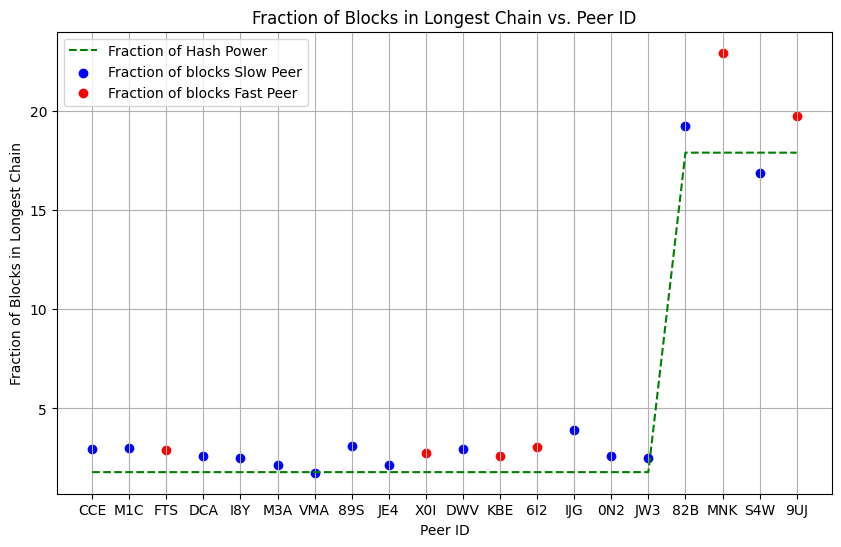

In [6]:
eval("results.json")